<a href="https://colab.research.google.com/github/nixonleonard/UTS-ML/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KASUS UTS Machine Learning

##Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score

##Import Datasets

In [ ]:
data = pd.read_csv("sample_data/insurance-cost.csv")
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Data Cleaning & Visual Exploratory Data Analysis

###Find Missing Value

Pertama tama dicek terlebih dahulu adakah data yang kosong atau missing value (NaN)

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

Setelah diteliti lebih lanjut, sesuai yang ditunjukan diatas, ternyata terdapat beberapa missing value

Data kosong terdapat pada data ke 30 pada kolom 'bmi' dan 32 pada kolom 'smoker' 

In [ ]:
data[29:34]

,age,sex,bmi,children,smoker,region,charges
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,NaN,0,yes,southwest,35585.57600
31,18,female,26.315,0,no,northeast,2198.18985
32,19,female,28.600,5,NaN,southwest,4687.79700
33,63,male,28.310,0,no,northwest,13770.09790


Data kosong terdapat pada data ke 51 pada kolom 'bmi' dan 53 pada kolom 'smoker'

In [ ]:
data[50:55]

,age,sex,bmi,children,smoker,region,charges
50,18,female,35.625,0,no,northeast,2211.13075
51,21,female,NaN,2,no,northwest,3579.82870
52,48,male,28.000,1,yes,southwest,23568.27200
53,36,male,34.430,0,NaN,southeast,37742.57570
54,40,female,28.690,3,no,northwest,8059.67910


###Insert Missing Value

Sesuai keterangan disoal, apabila missing value bersifat continuous, maka missing value tersebut diisi dengan nilai rata rata(mean) dari variabel

Sesuai keterangan disoal juga, apabila missing value bersifat categorical, maka missing value tersebut diisi dengan nilai terbanyak(modus) dari variabel

Pengisian missing value juga mempertimbangkan jenis kelamin, jadi apabila data yang memiliki missing value tersebut seorang pria, maka akan diisi mean atau modus dari semua data yang berjenis kelamin pria

In [ ]:
dataMale = data[data['sex'] == 'male']
dataFemale = data[data['sex'] == 'female']

Mean untuk kolom 'bmi' dan modus untuk kolom 'smoker' berjenis kelamin pria

In [ ]:
meanMale = dataMale['bmi'].mean()
modeMale = dataMale['smoker'].mode()
print('Mean kolom \'bmi\' seorang pria : ', meanMale)
print('Modus kolom \'smoker\' seorang pria : ', modeMale[0])

Mean kolom 'bmi' seorang pria :  30.93622962962961
Modus kolom 'smoker' seorang pria :  no


Mean untuk kolom 'bmi' dan modus untuk kolom 'smoker' berjenis kelamin pria

In [ ]:
meanFemale = dataFemale['bmi'].mean()
modeFemale = dataFemale['smoker'].mode()
print('Mean kolom \'bmi\' seorang wanita : ', meanFemale)
print('Modus kolom \'smoker\' seorang wanita : ', modeFemale[0])

Mean kolom 'bmi' seorang wanita :  30.37282904689867
Modus kolom 'smoker' seorang wanita :  no


Mengisi missing value yang ada dari ketentuan diatas

In [ ]:
dataMale['bmi'] = dataMale['bmi'].fillna(meanMale)
dataMale['smoker'] = dataMale['smoker'].fillna(modeMale[0])
dataFemale['bmi'] = dataFemale['bmi'].fillna(meanFemale)
dataFemale['smoker'] = dataFemale['smoker'].fillna(modeFemale[0])

data = pd.concat([dataMale, dataFemale])
data = data.sort_index(axis = 0)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Setelah diisi missing value dan digabungkan datanya, dibawah ditunjukan bahwa missing value telah terisi sesuai dengan ketentuan yang ada

In [ ]:
data[29:34]

,age,sex,bmi,children,smoker,region,charges
29,31,male,36.30000,2,yes,southwest,38711.00000
30,22,male,30.93623,0,yes,southwest,35585.57600
31,18,female,26.31500,0,no,northeast,2198.18985
32,19,female,28.60000,5,no,southwest,4687.79700
33,63,male,28.31000,0,no,northwest,13770.09790


In [ ]:
data[50:55]

,age,sex,bmi,children,smoker,region,charges
50,18,female,35.625000,0,no,northeast,2211.13075
51,21,female,30.372829,2,no,northwest,3579.82870
52,48,male,28.000000,1,yes,southwest,23568.27200
53,36,male,34.430000,0,no,southeast,37742.57570
54,40,female,28.690000,3,no,northwest,8059.67910


###Melakukan Encoding untuk data categorical menjadi continuous

Menggunakan label encoder untuk mengubah data dari categorical menjadi continuous

In [ ]:
lb = LabelEncoder()
data.iloc[:,1] = lb.fit_transform(data.iloc[:,1])
data.iloc[:,4] = lb.fit_transform(data.iloc[:,4])
data.iloc[:,5] = lb.fit_transform(data.iloc[:,5])
data = pd.DataFrame(data)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


**Keterangan setelah encoder :**

sex : 0 (female) , 1 (male)

smoker : 0 (no), 1 (yes)

region : 0 (northeast), 1 (northwest), 2 (southeast), 3 (southwest)

###Visualisasi independent variabel

Memvisualisasikan tiap independent variabel dan penjelasan hubungan tiap independent variabels menggunakan boxplot

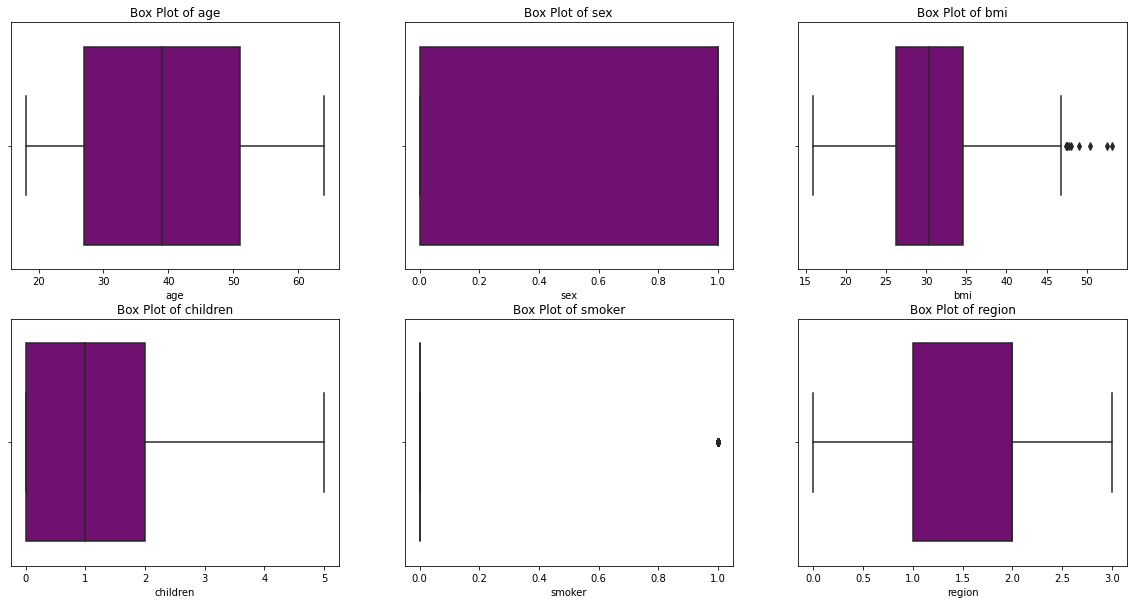

In [ ]:
plt.figure(figsize=(20,10))
for i, col in zip(range(1, 7), data.columns):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, data=data, color='purple')
    plt.title(f"Box Plot of {col}")
plt.show()

Diatas merupakan visualisasi setiap independent variabel yang ada, bisa kita lihat dari boxplot diatas bahwa pada data bmi, masih memiliki outliers, pada soal tidak perlunya kita membuang outliers, jadi tidak perlu dihilangkan

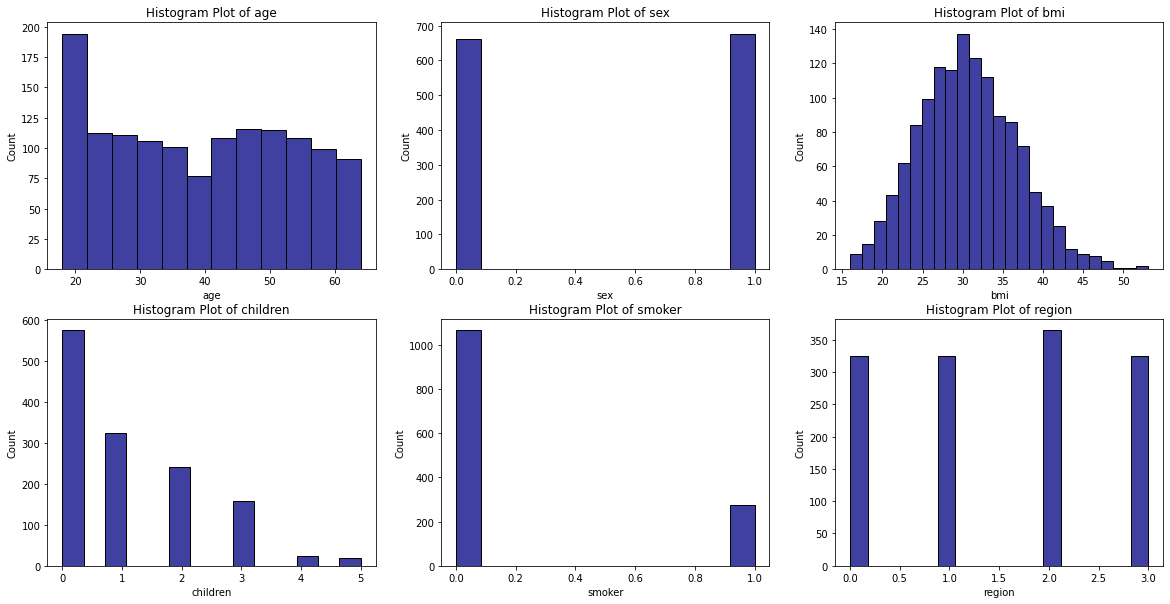

In [ ]:
plt.figure(figsize=(20,10))
for i, col in zip(range(1, 7), data.columns):
    plt.subplot(2, 3, i)
    sns.histplot(x=col, data=data, color='navy')
    plt.title(f"Histogram Plot of {col}")
plt.show()

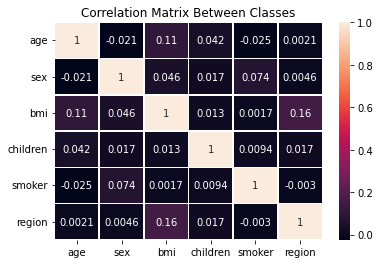

In [ ]:
# plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:,:-1].corr(), annot=True, linewidths=0.5,).set_title('Correlation Matrix Between Classes')

plt.show()

Untuk hubungan antar independent variabel bisa dilihat dari data correlation diatas, dimana age dengan bmi memiliki korelasi atau hubungannya paling besar dibandingkan yang lainnya, bmi dengan region juga sama, memiliki korelasi paling besar dibandingkan lainnya. Maksdunya bahwa jadi kemungkinan apabila nilai bmi berubah ubah, kemungkinan juga nilai dari age serta region juga bisa berubah bergantung pada nilai bmi

###Visualisasi grafik correlation

Memvisualisasikan tiap independent variabel dengan dependent variabel, dan penjelasan tiap korelasi dari variabel tersesbut.

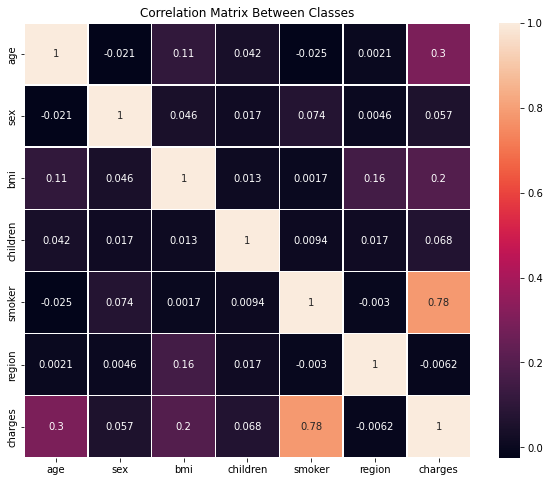

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,).set_title('Correlation Matrix Between Classes')

plt.show()

**Dari atas ini kita bisa lihat bahwa :**

Korelasi antara variabel sex, children, region, dengan charges, dibawah 0.01, berarti variabel independent tersebut memiliki korelasi yang sangat rendah 

Korelasi antara variabel age, bmi, dengan variabel charges kurang lebih kisaran 0,1 - 0,5 yang berarti korelasinya juga cukup rendah 

Korelasi antara variabel smoker dengan charges yaitu diatas 0,5 yang berarti korelasinya cukup tinggi dengan charges

_Saya tidak mendrop column karena pada soal tidak ada keterangan untuk mendrop column apapun .._

##Training dan Testing Data 

Sesuai ketentuan yang ada di soal, Training dan Testing Data sebesar 4:1, jadi testing data sebesar 20%

In [ ]:
# X = data[['age','bmi','smoker']]
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 1)

print('Training Data :')
print('Data train X ')
print(X_train)
print('--------------------------------')
print('Data train y ')
print(y_train)

Training Data :
Data train X 
[[ 0.98207621 -1.0105187  -0.66582807 -0.90861367 -0.50629836 -0.46691549]
 [ 0.98207621  0.98959079 -1.5191431  -0.07876719 -0.50629836  1.34390459]
 [-1.50996545  0.98959079  1.0883907  -0.90861367 -0.50629836  0.43849455]
 ...
 [ 0.83967383 -1.0105187   0.70603993  0.75107928  1.97511997 -1.37232554]
 [ 0.05646073 -1.0105187  -1.38458189  0.75107928  1.97511997  0.43849455]
 [ 1.26688097  0.98959079 -0.44593536 -0.07876719 -0.50629836  0.43849455]]
--------------------------------
Data train y 
216     10355.64100
731     10065.41300
866      1141.44510
202     13012.20865
820      7445.91800
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 1070, dtype: float64


Menampilkan training set dari data X dan data y setelah dilakukan spliting

##Modeling Linier Regression with Gradient Descent

Pada tahap ini, membuat model linier regression dengan gradient descent, dengan menghitung linier lost, derivative lost w dan b, serta function gradient descentnya, dengan linierlost = 0.001

Keterangan :

w = weight / theta

b = bias / intercept



In [ ]:
def prediction(w,X,b):                          
    predList=[]
    for i in range(len(X)):
        predList.append(w@X[i]+b)
    return np.array(predList)

def linLost(y,predY):                             
    s=0
    for i in range(len(y)):
        s+=(y[i]-predY[i])**2
    return (1/len(y))*s

def derLostW(X,y,predY):                    
    s=0
    n=len(y)
    for i in range(n):
        s+=-X[i]*(y[i]-predY[i])
    return (2/n)*s
    
def derLostB(y,predY):                   
    s=0
    for i in range(len(y)):
        s+=-(y[i]-predY[i])
    return (2/len(y)) * s
        
def gradientDescent(X,y):              
    wVector=np.random.randn(X.shape[1])        
    b=0                                                               
    epoch = 2000
    n = len(X)
    linLostList=[]                                                       
    learningRate = 0.001

    for i in range(epoch):
        predY = prediction(wVector,X,b)
        wVector = wVector - learningRate *derLostW(X,y,predY) 
        b = b - learningRate * derLostB(y,predY)
        linLostList.append(linLost(y,predY))
        
    plt.plot(np.arange(1,epoch),linLostList[1:])
    plt.xlabel("epoch number")
    plt.ylabel("the linier loss")
    
    return wVector,b

Setelah memuat model, langsung panggil modelnya saja dari data yang sudah di train

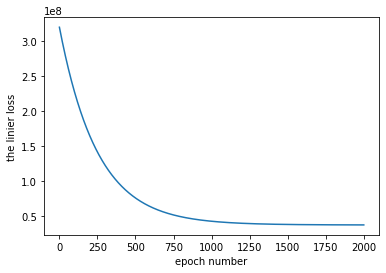

In [ ]:
weight, bias = gradientDescent(X_train, y_train.to_numpy())

Melakukan prediksi dengan data test diatas, lalu membandingkan prediksi data test dengan data test real nya

In [ ]:
def predictionVar(X):
  return bias + np.dot(X, weight)

predicted_y= predictionVar(X_test)
printCompare = pd.DataFrame({
    'prediciton_y': predicted_y,
    'test_y': y_test
})

printCompare.head(10)

,prediciton_y,test_y
559,4427.639992,1646.42970
1087,12738.826745,11353.22760
1020,12343.539027,8798.59300
460,13215.000790,10381.47870
802,575.568280,2103.08000
298,31464.139081,38746.35510
481,13052.362297,9304.70190
616,11923.196087,11658.11505
763,3765.171507,3070.80870
750,29104.066772,19539.24300


##Evaluasi pemodelan Linier Regression

Persamaan Regeression 

y = w0 + w1\*x1 + w2\*x2 + w3\*x3 + w4\*x4 + w5\*x5 + w6\*x6

Keterangan :

y = predicted value

w0 = bias / intercept

w1 = weight data age, x1 = value data age

w2 = weight data sex, x2 = value data sex

w3 = weight data bmi, x3 = value data bmi

w4 = weight data children, x4 = value data children

w5 = weight data smoker, x5 = value data smoker

w6 = weight data region, x6 = value data region

Dari permodelan diatas, didapatkan evaluasi dan ditemukan nilai bias dan weight

In [ ]:
print("Bias / Intercept / w0")
print("w0 / b : ", bias)
print("")
print("Weight / Theta")
print("w1 : ", weight[0])
print("w2 : ",weight[1])
print("w3 : ",weight[2])
print("w4 : ",weight[3])
print("w5 : ",weight[4])
print("w6 : ",weight[5])

Bias / Intercept / w0
w0 / b :  13018.913632315662

Weight / Theta
w1 :  3533.13902592283
w2 :  -30.118865224369024
w3 :  1906.4133049948712
w4 :  455.1410458924637
w5 :  9366.127857229016
w6 :  -328.0365489837425


Dibawah merupakan evaluasi dari nilai prediksi, MAE, MSE, RMSE, dan R2Score

In [ ]:
MAE = mean_absolute_error(y_test, predicted_y)
MSE = mean_squared_error(y_test, predicted_y)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predicted_y)

print("mean_absolute_error : ", MAE)
print("mean_squared_error : ",MSE)
print("rmse : ",RMSE)
print("r2_score : ", r2)

mean_absolute_error :  4027.75912847358
mean_squared_error :  35662779.19555419
rmse :  5971.8321473023825
r2_score :  0.761102449127449


Penjelasan singkat, 

MAE yang didapatkan dari model yang dibuat sebesar 4027.7591284.
Nah MAE atau Mean Absolute Error merupakan besar kesalahan rata rata absolut error dari nilai testing atau nilai aslinya dengan nilai prediksi.

MSE yang didapatkan dari model yang dibuat sebesar 35662779.19555419. MSE atau Mean Squared Error merupakan selisih atau nilai kesalahan yang ada antara nilai testing atau nilai aslinya dengan nilai prediksi.

RMSE yang didapatkan dari model yang dibuat sebesar 5971.8321473023825. RNSE atau Root Mean Square Error ini sama seperti MSE hanya saja nilainya di kuadratkan antara nilai testing atau asli dengan nilai prediksi. 

R2_Score yang didapatkan dari model diatas sebesar  0.761102449127449, maksudnya bahwa akurasi dari model yang dibuat sebesar 0.76 dimana bisa dibilang cukup bagus dari model yang dibentuk.


##Plot hasil dari Predicted Value vs Actual Value

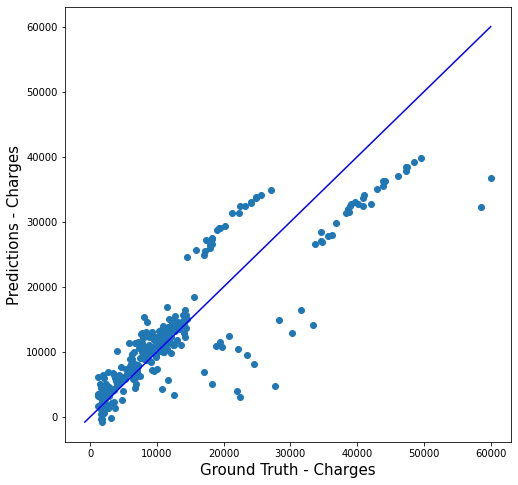

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predicted_y)

p1 = max(max(y_test), max(predicted_y))
p2 = min(min(y_test), min(predicted_y))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Ground Truth - Charges', fontsize=15)
plt.ylabel('Predictions - Charges', fontsize=15)
plt.show()

Diatas merupakan plotting yang menggambarkan nilai prediksi dengan nilai asli, terlihat ada 2 outliers dari data tersebut